He3_kin1 D2_kin1
0 He3_kin1
        Xbj     Ne     Yield     Error     yield  Stat_err
2  0.190479  18549  0.001842  0.000019  0.001842  0.000135
3  0.205696  17430  0.001762  0.000018  0.001762  0.000133
4  0.221714  13982  0.001437  0.000016  0.001437  0.000122
5  0.237721  11538  0.001204  0.000014  0.001204  0.000112
0 D2_kin1
        Xbj     Ne     Yield     Error     yield  Stat_err
2  0.190496  18839  0.001187  0.000013  0.001187  0.000086
3  0.205728  17514  0.001123  0.000013  0.001123  0.000085
4  0.221735  14130  0.000921  0.000011  0.000921  0.000077
5  0.237735  11776  0.000779  0.000010  0.000779  0.000072
He3_kin11 D2_kin11
1 He3_kin11
         Xbj    Ne     Yield         Error     yield  Stat_err
27  0.590000  2475  0.000030  6.080960e-07  0.000030  0.000006
28  0.605765  2199  0.000026  5.753630e-07  0.000026  0.000006
29  0.621837  1789  0.000022  5.201230e-07  0.000022  0.000005
30  0.637554  1473  0.000018  4.733560e-07  0.000018  0.000005
31  0.653568  1216  0.0000

/home/jbane/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1 He3_kin11
2 He3_kin13
2 He3_kin13
3 He3_kin15
3 He3_kin15
5 He3_kin2
5 He3_kin2
6 He3_kin3
6 He3_kin3
7 He3_kin4
7 He3_kin4
8 He3_kin5
8 He3_kin5
9 He3_kin7
9 He3_kin7
10 He3_kin9
10 He3_kin9


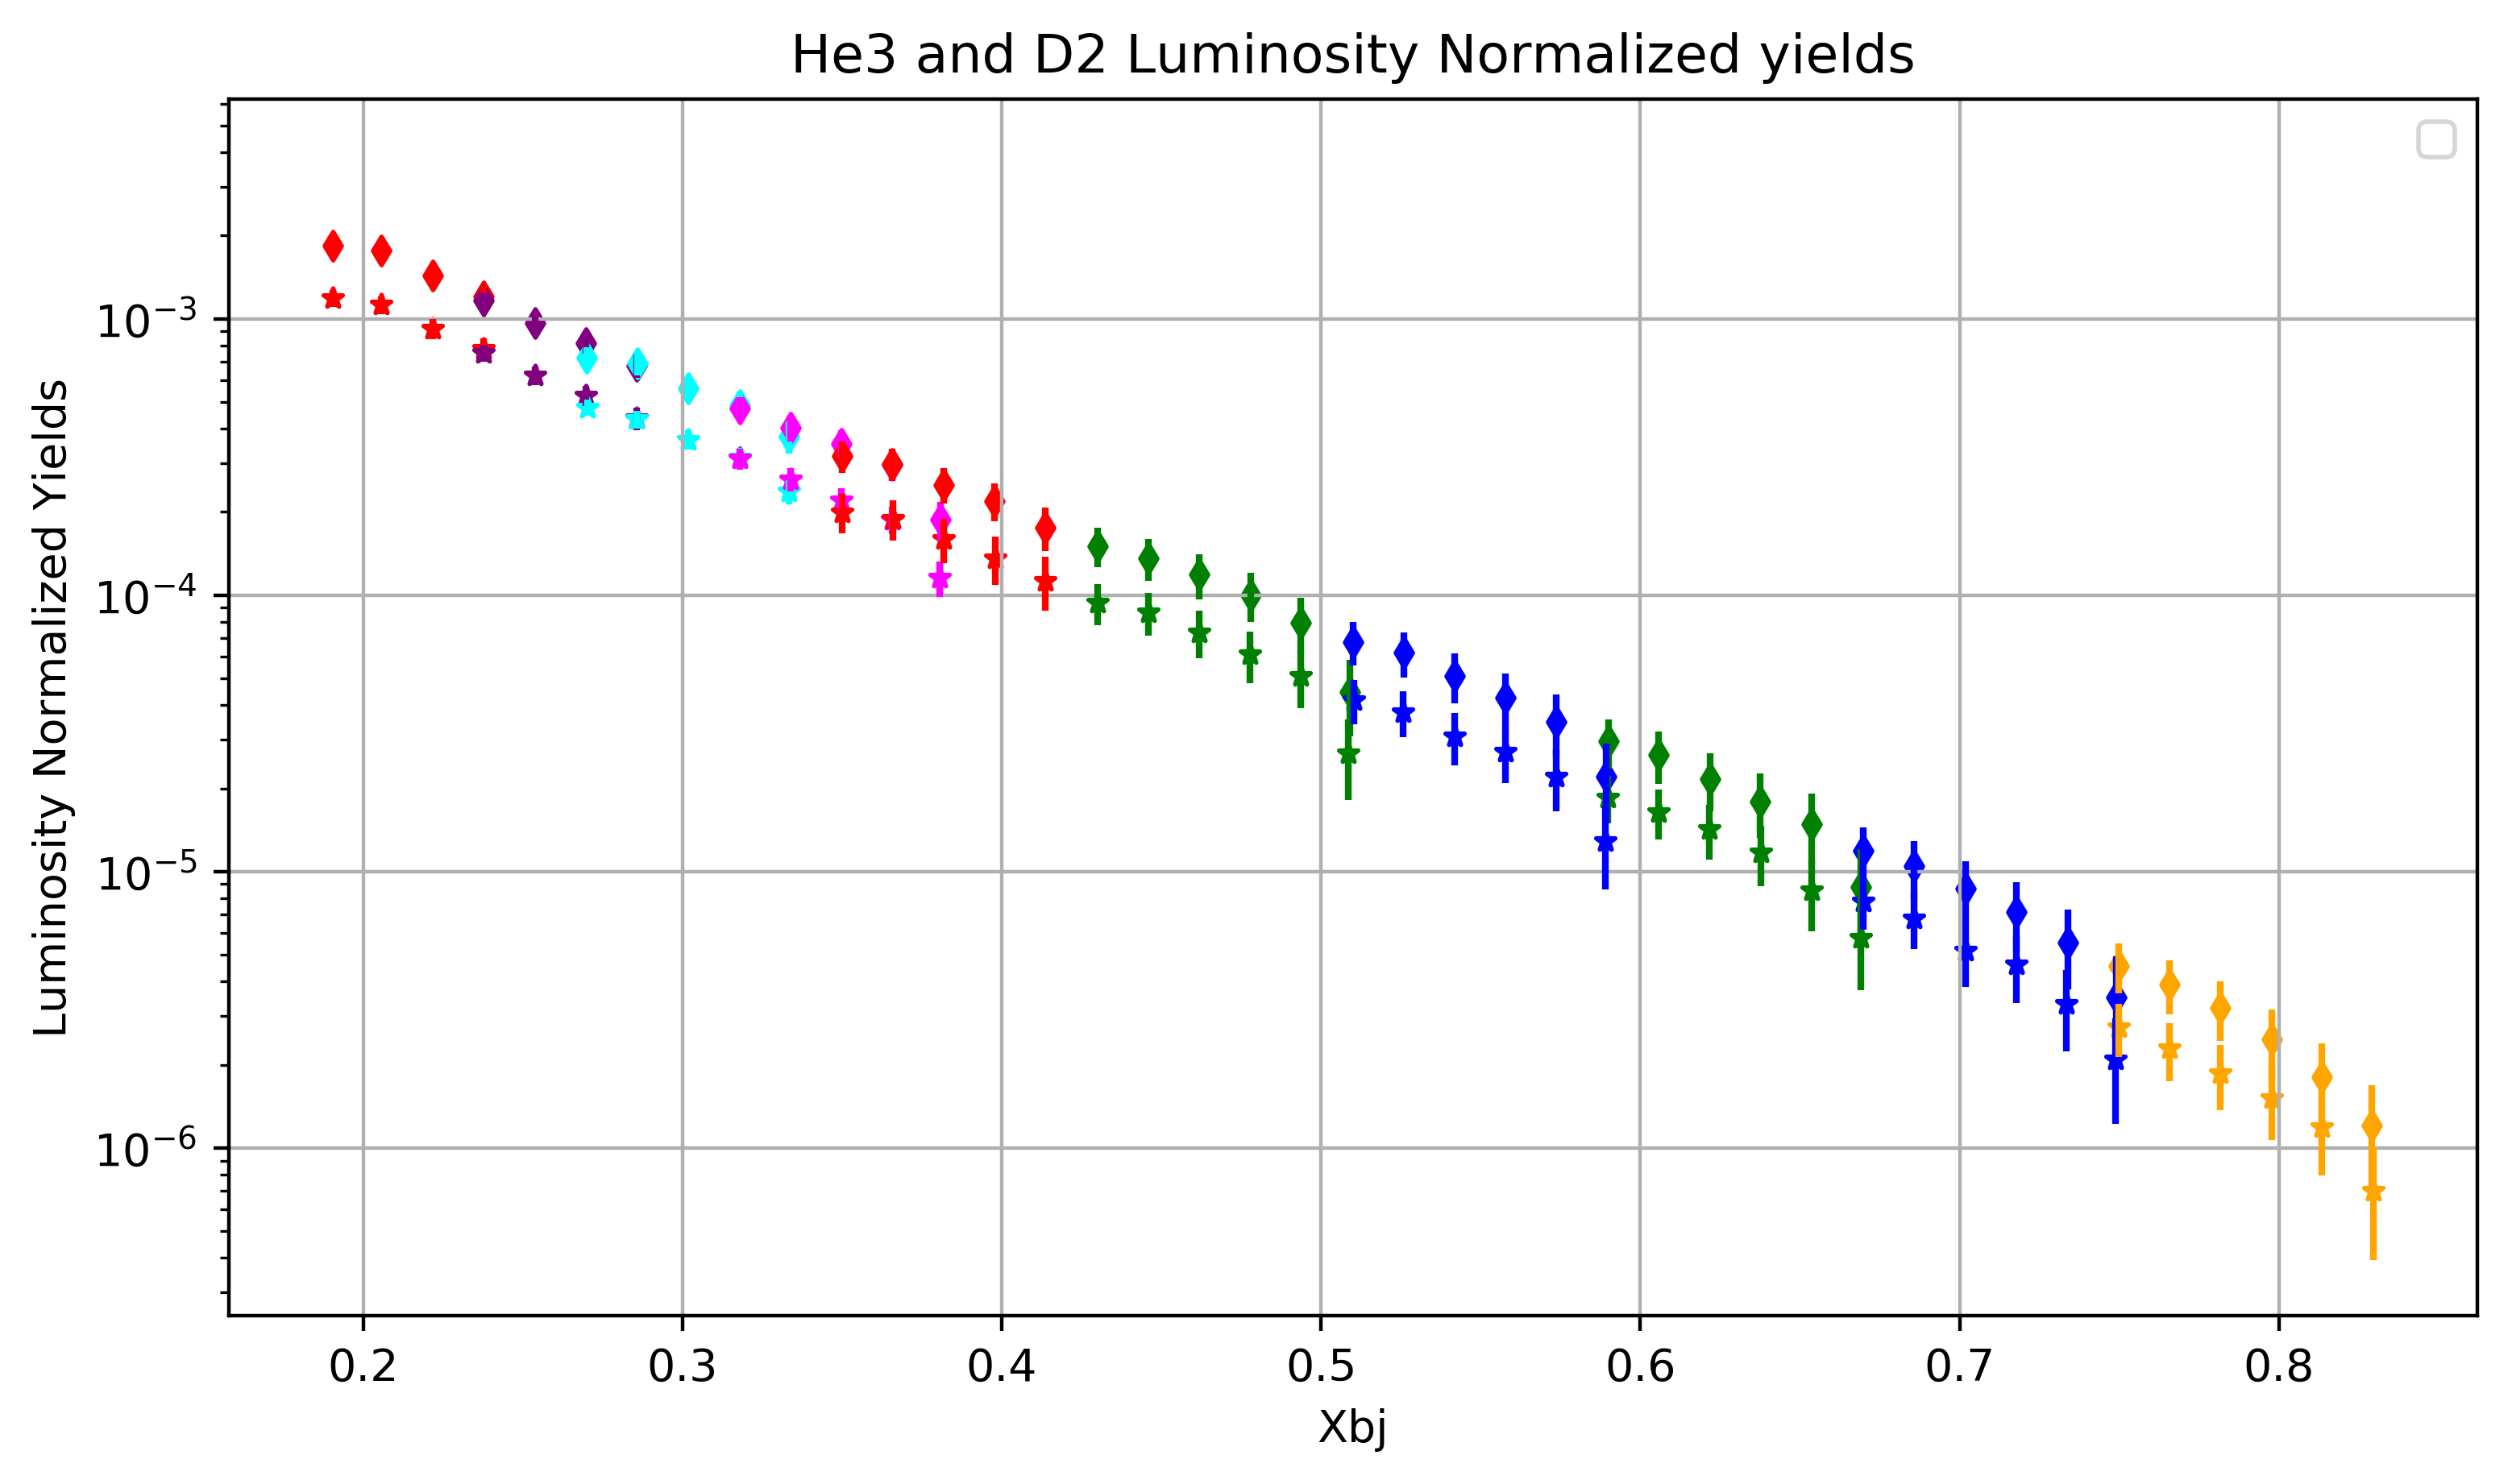

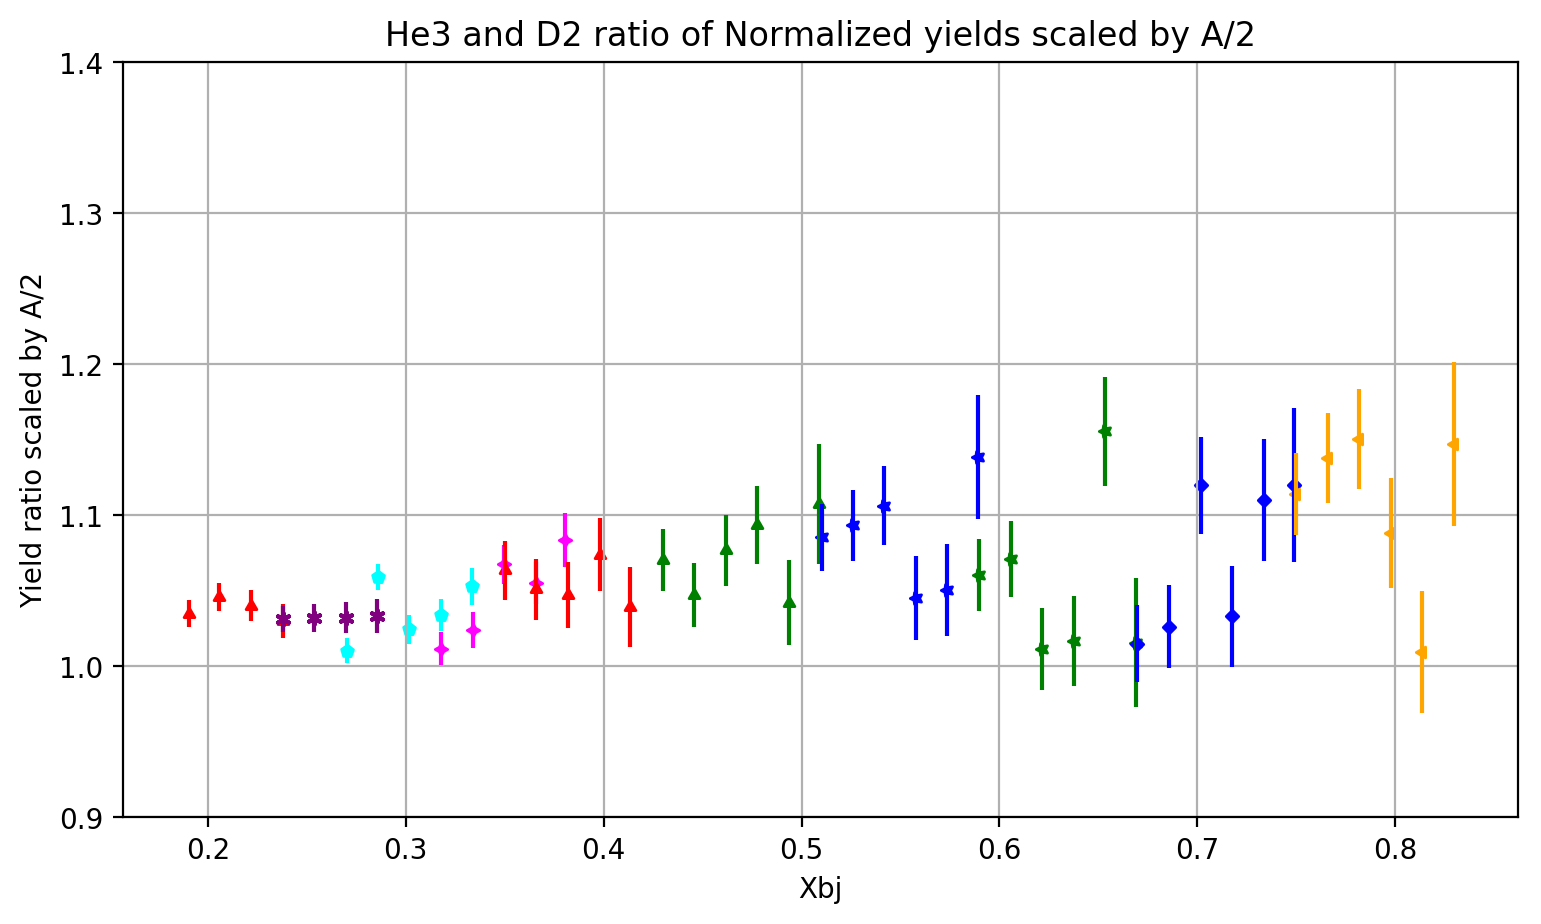

In [34]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import matplotlib.pyplot as plt
import os,sys
import glob
import numpy as np



tgt="He3"
tgt2="D2"

Xaxis="Xbj" #theta / Xbj
if Xaxis == "Xbj":
    xaxis="xbj"
else :
    xaxis="theta"

    
#runs=[1207,1233,1279,2570,1344,2632]
#if len(sys.argv) >1:
#    for i in range(1,len(sys.argv),1):
#        runs.append(sys.argv[i])
#else :
#    print('Please enter the runs you want to look at! -1 when done')
#    run=0
#    i=0
#    while run is not -1:
#        i=i+1
#        run=int(input("{}  ".format(i)))
#        if run==-1:
#            break
#        runs.append(run)       
#print( "Will look at runs ", runs)
#datafile='/home/jbane/tritium/Tri_offline/MC_comparison/yield_output/{}/'.format(xaxis)
datafile='/home/jbane/tritium/Tri_offline/yield/yield_output/{}/'.format(xaxis)
kins={}
kins2={}
kin={}
kin2={}

kins=sorted(glob.glob('{}{}*.dat'.format(datafile,tgt)))
kins2=sorted(glob.glob('{}{}*.dat'.format(datafile,tgt2)))

mcDF={}
dataDF={}
dataDF2={}
mcDFs={}
dataDFs={}
dataDFs2={}
ratios={}

Achk1={}
Achk2={}
i=0
for i in range(len(kins)):
    kin[i] = kins[i].replace(datafile,"")
    kin[i] = kin[i].replace('.dat',"")

    
        
    pos=kin[i].find('kin')
    kin2[i]='{}_kin{}'.format(tgt2,kin[i][pos+3:])
    print(kin[i] , kin2[i])
    #kin2[i] = kins2[i].replace(datafile,"")
    #kin2[i] = kin2[i].replace('.dat',"")
        
        
        
    mcfileR=datafile+'{}.dat'.format(kin2[i])
    datafileR=datafile+'{}.dat'.format(kin[i])
    #print(datafileR)
    #print(mcfileR)
    chk1=0
    chk=0
    if os.path.isfile(mcfileR):
        chk=1
        
    else:
        print("MC file does not exist") 
        chk=0
    Achk1[i]=chk
    if os.path.isfile(datafileR):
        chk1=1
    else :
        print("Data file does not exist")
        chk1=0
    Achk2[i]=chk1
    if chk==0 or chk1==0:
        [print("Skipping ")]
        continue     
    if kin[i] == '{}_kin16'.format(tgt):
        Achk2[i]=0
        Achk1[i]=0
        
        
    dataDF2[i]=pd.read_table(mcfileR,delim_whitespace=True)
    dataDF[i]=pd.read_table(datafileR,delim_whitespace=True)
    
 
    #mcDF[i]['yield']=mcDF[i]['Yield']/1000.0
    #mcDF[i]['Error']=mcDF[i]['Error']/1000.0
    
    dataDF[i]['yield']=dataDF[i]['Yield']
    dataDF2[i]['yield']=dataDF2[i]['Yield']
    #mcmed=mcDF[i]['yield'].mean()
    datamed=dataDF[i]['yield'].mean()
    datamed2=dataDF2[i]['yield'].mean()
    
    #mcDFs[i]=mcDF[i][mcDF[i]['yield'] >=mcmed *0.5]
    dataDFs[i]=dataDF[i][dataDF[i]['yield'] >= datamed *0.5].copy()
    dataDFs2[i]=dataDF2[i][dataDF2[i]['yield'] >= datamed2 *0.5].copy()
    #mcDFs[i]=mcDFs[i].dropna()
    dataDFs[i]=dataDFs[i].dropna()
    dataDFs2[i]=dataDFs2[i].dropna()
    #drop the first 2 and last 2 bins
    
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
    dl=len(dataDFs[i])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[dl-1])
    #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[dl-2])    
    
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[0])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[0])
    ml=len(dataDFs[i])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[ml-1])
  #  mcDFs[i]=mcDFs[i].drop(mcDFs[i].index[ml-2])
    
    
   
    if len(dataDFs[i]) <2 :
            continue
    #print(len(dataDFs[i].index), len(dataDFs[i]))       
                #cut put the edge bins for now

        
    if len(dataDFs[i]) >=5 :   
        #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
        #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[0])
        last= len(dataDFs[i].index)
        dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[last-1])
        #dataDFs[i]=dataDFs[i].drop(dataDFs[i].index[last-2])
    #print(len(dataDFs[i].index), len(dataDFs[i]))
    if len(dataDFs[i]) >=5 :   
        #dataDFs2[i]=dataDFs2[i].drop(dataDFs2[i].index[0])
        #dataDFs2[i]=dataDFs2[i].drop(dataDFs2[i].index[0])
        last= len(dataDFs2[i].index)
        dataDFs2[i]=dataDFs2[i].drop(dataDFs2[i].index[last-1])
        #dataDFs2[i]=dataDFs2[i].drop(dataDFs2[i].index[last-2])
    #print(len(dataDFs2[i].index), len(dataDFs2[i]))
    
    if len(dataDFs[i]) > 3:
        dataDFs[i] =dataDFs[i][dataDFs[i].index  >= dataDFs[i]["Ne"].idxmax()]
    if len(dataDFs2[i]) > 3:
        dataDFs2[i] =dataDFs2[i][dataDFs2[i].index  >= dataDFs2[i]["Ne"].idxmax()]
    #minind= dataDFs[i].index[0]
    #axind=dataDFs[i].index[len(dataDFs[i].index)-1]
    
    #mcDFs[i]=mcDFs[i][mcDFs[i].index>=minind]
    #mcDFs[i]=mcDFs[i][mcDFs[i].index<=maxind]        
            
    
    print(i,kin[i])
    
    
    #dataDFs[i]= dataDFs[i].drop(dataDFs[i].index[[0,len(dataDFs[i])-1]])
    #mcDFs[i]=     mcDFs[i].drop(mcDFs[i].index[  [0,  len(mcDFs[i])-1]])
    dataDFs[i]['Stat_err']=(1.0/np.sqrt(dataDFs[i]['Ne']) )*dataDFs[i]['yield']*10
    
    dataDFs2[i]['Stat_err']=(1.0/np.sqrt(dataDFs2[i]['Ne']))*dataDFs2[i]['yield']*10
    ratios[i] = dataDFs2[i].copy()
#    ratios[i].drop('yield')
    ratios[i]['data_Y'] =dataDFs[i]['yield']
    ratios[i]['MC_Y'] = dataDFs2[i]['yield']
    ratios[i]['ratio'] = dataDFs[i]['yield']/dataDFs2[i]['yield'] * (2/3)
    ratios[i]['offset'] = dataDFs[i]['yield'] - dataDFs2[i]['yield']
    ratios[i]['Stat_err2'] = dataDFs2[i]['Stat_err']
    ratios[i]['Stat_errR'] = np.sqrt(ratios[i]['ratio'] *( pow(ratios[i]['Stat_err2']/dataDFs2[i]['yield'],2) 
                                                         + pow(ratios[i]['Stat_err']/dataDFs[i]['yield'],2) ))/10
    print(dataDFs[i])
    print(i,kin2[i])
    print(dataDFs2[i])
    #i=i+1
    
#import matplotlib._color_data as mcd
#overlap = [name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS]

markers =[[3,0,0]  ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,0] ,[4,1,0],[3,0,0]]
markers2 =[[3,0,0] ,[5,1,90] ,[4,0,90],[3,1,90],[6,2,0] ,[5,0,70],[4,1,0],[3,0,0]]
colors=['red', 'Green', 'Blue', 'Orange', 'Purple', 'Cyan', 'Magenta','Teal','Brown','Maroon','Navy']#, f032e6, bcf60c, fabebe, 008080, e6beff, 9A6324, fffac8, 800000, aaffc3, 808000, ffd8b1, 000075, a9a9a9, ffffff, 000000]

print("check")
fig= plt.figure(dpi=400,figsize=(9,5))

ax=fig.add_subplot(1,1,1)
plt.title('{} and {} Luminosity Normalized yields'.format(tgt,tgt2))
#bx=fig.add_subplot(2,1,2, sharex=ax)
fig2= plt.figure(dpi=200,figsize=(9,5))
plt.title('{} and {} ratio of Normalized yields scaled by A/2'.format(tgt,tgt2))
bx=fig2.add_subplot(1,1,1)
print("check")
line1=[]
line2=[]
k=int(0)
m=int(0)
first=1
for j in range(len(dataDFs)):
    if Achk1[j] != Achk2[j] or Achk1[j] ==0:
        continue
    #xkcd = mcd.XKCD_COLORS["xkcd:" + overlap[j]].upper()
    #xkcd2 = mcd.XKCD_COLORS["xkcd:" + overlap[j+len(mcDF)]].upper()
    print(j , kin[j])
    #print()
    kk = 7-m
    if k == 7:
        k = 0
    if m == 8:
        m = 0
    if len(dataDFs[j]) == 0:
        continue

    #if j == 110:
     #   ax = mcDFs[j].plot(x='theta',y='yield',yerr=':error',kind='scatter', marker=markers[j], color='blue', label='MC run{}'.format(runs[j]))
    #else :
    #mcDFs[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Error',kind='scatter',marker=markers[j], color='blue', label='MC {}'.format(kin[j]))

    
    #line1 +=ax.errorbar( x=dataDFs[j]['{}'.format(Xaxis)] , y=dataDFs[j]['yield'] ,yerr=dataDFs[j]['Stat_err']*10 ,fmt='H',label='{}'.format(kin[j]))    
    #line2 +=ax.errorbar( x=dataDFs2[j]['{}'.format(Xaxis)], y=dataDFs2[j]['yield'],yerr=dataDFs2[j]['Stat_err']*10,fmt='*',label='{}'.format(kin2[j]))
   # dataDFs2[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Stat_err',fmt='H',kind="errorbar", marker=markers2[3], color=colors[k], label='{}'.format(kin2[j]) )
    #dataDFs2[j].errorbar(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Stat_err',fmt='H', marker=markers2[3], color=colors[k], label='{}'.format(kin2[j]) )
   
   # dataDFs[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Stat_err',fmt='H', kind="errorbar", marker="*", color=colors[k], label='{}'.format(kin[j]))
    if tgt =="H3" :
        mar='4'
    else :
        mar="d"
    dataDFs[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Stat_err',kind='scatter', marker=mar, color=colors[k])
    dataDFs2[j].plot(ax=ax,x='{}'.format(Xaxis),y='yield',yerr='Stat_err',kind='scatter', marker='*', color=colors[k])
    ratios[j].plot(ax=bx,x='{}'.format(Xaxis) ,y='ratio',yerr='Stat_errR',  kind='scatter',marker=markers2[m],color=colors[k] )
    k=k+1
    m=m+1
    print(j , kin[j])    
    first=2
#ax.legend(False)
ax.legend(line1[:len(line1)],['{} yields'.format(tgt)] )
ax.set_yscale("log")
ax.set_ylabel("Luminosity Normalized Yields")
ax.grid(True)
#bx.grid(True)
#ax.legend(ncol=3)
#bx.legend(ncol=2)
#bx.set_yscale("log")
bx.grid(True)
bx.set_ylabel("Yield ratio scaled by A/2")
fig.subplots_adjust(hspace=0)
fig.savefig('images/{}_dataall.png'.format(tgt))
#ax.set_ylim(0.000007,0.000025)
bx.set_ylim(0.9,1.4)
fig2.savefig('images/{}_{}ratio.png'.format(tgt,tgt2))


dataDFs[10]

In [23]:
print(kin[10])
print(dataDFs2[10][['Xbj','Ne','yield','Stat_err']])

He3_kin9
         Xbj    Ne     yield  Stat_err
22  0.510162  3035  0.000042  0.000008
23  0.525764  2733  0.000038  0.000007
24  0.541752  2216  0.000031  0.000007
25  0.557856  1935  0.000027  0.000006
26  0.573537  1567  0.000022  0.000006
27  0.588945   910  0.000013  0.000004


In [28]:
Achk1

{0: 1, 1: 1, 2: 1, 3: 1, 4: 0, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}

In [294]:
1/np.sqrt(2000)

0.022360679774997897

In [220]:
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)


In [277]:
ratios[1]

,Xbj,Ne,Yield,Error,yield,Stat_err,data_Y,MC_Y,ratio,offset,Stat_err2,Stat_errR
27,0.589872,2635,0.000017,3.451860e-07,0.000017,3.392468e-07,0.000024,0.000017,0.922698,0.000007,3.392468e-07,0.023086
28,0.605763,2317,0.000015,3.230150e-07,0.000015,3.181121e-07,0.000022,0.000015,0.937785,0.000006,3.181121e-07,0.024684
29,0.621666,1997,0.000013,2.992540e-07,0.000013,2.953266e-07,0.000018,0.000013,0.919235,0.000005,2.953266e-07,0.026503
30,0.637868,1635,0.000011,2.701380e-07,0.000011,2.672255e-07,0.000015,0.000011,0.908764,0.000004,2.672255e-07,0.029239
31,0.653594,1187,0.000008,2.294920e-07,0.000008,2.276879e-07,0.000012,0.000008,0.981146,0.000004,2.276879e-07,0.034759
32,0.669156,794,0.000005,1.872120e-07,0.000005,1.862233e-07,0.000007,0.000005,0.952317,0.000002,1.862233e-07,0.042275


In [279]:
0.04/0.95

0.04210526315789474

In [291]:
plt.plot( y= 1/np.sqrt(x))

NameError: name 'x' is not defined